# Alpha lifetime

**Combine measurements of lifetimes to show its evolution.**

In [1]:
import time
import datetime
import glob
import collections
print(datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

import numpy as np
import tables as tb
import matplotlib.pyplot as plt

import invisible_cities.core.core_functions as coref

from icaro.core.kdst_functions import event_rate
from icaro.core.kdst_functions import profile_and_fit
from icaro.core.kdst_functions import lifetime
from icaro.core.kdst_functions import load_lifetimes
from icaro.core.kdst_functions import str_to_datetime
from icaro.core.kdst_functions import datetime_to_str
from icaro.core.kdst_functions import to_deltatime

2017-06-17 19:43:15


In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams["figure.figsize"] = 15, 8
plt.rcParams["font.size"] = 15

# Configuration

In [4]:
filename  = "Lifetimes.txt"
min_run   = 0
max_run   = 100000
min_date  = datetime.datetime.strptime("2017-05-16-00:00:00", "%Y-%m-%d-%H:%M:%S")
max_date  = datetime.datetime.strptime("2116-12-31-23:59:59", "%Y-%m-%d-%H:%M:%S")

In [5]:
lifetimes = load_lifetimes(filename)
lifetimes = lifetimes[coref.in_range(lifetimes.Run, min_run, max_run+1)]
lifetimes = lifetimes[coref.in_range(np.array(list(map(str_to_datetime, lifetimes.Date_start.values))),
                                     min_date, max_date)]

### Remarkable Changes in Gas System

In [6]:
# Getter configuration changes:

c1 = datetime.datetime.strptime('2017-05-17 00:00:0', '%Y-%m-%d %H:%M:%S')  #from no circulation to almost no circulation
c2 = datetime.datetime.strptime('2017-05-18 17:05:0', '%Y-%m-%d %H:%M:%S')  #from almost no circulation to both cold getters
c3 = datetime.datetime.strptime('2017-05-19 14:00:0', '%Y-%m-%d %H:%M:%S')  #from both cold getters to only new one
c4 = datetime.datetime.strptime('2017-05-22 19:00:0', '%Y-%m-%d %H:%M:%S')  #from new cold getter to both new cold and old one

k1 = datetime.datetime.strptime('2017-05-27 16:00:0', '%Y-%m-%d %H:%M:%S')  #Open Kr valves
k2 = datetime.datetime.strptime('2017-06-06 15:00:0', '%Y-%m-%d %H:%M:%S')  #Close Kr valves

DP = datetime.datetime.strptime('2017-05-29 20:00:0', '%Y-%m-%d %H:%M:%S')  #Change in alphas drift potential

changes = [c1, c2, c3, c4]
kripton = [k1, k2]

# Lifetime evolution

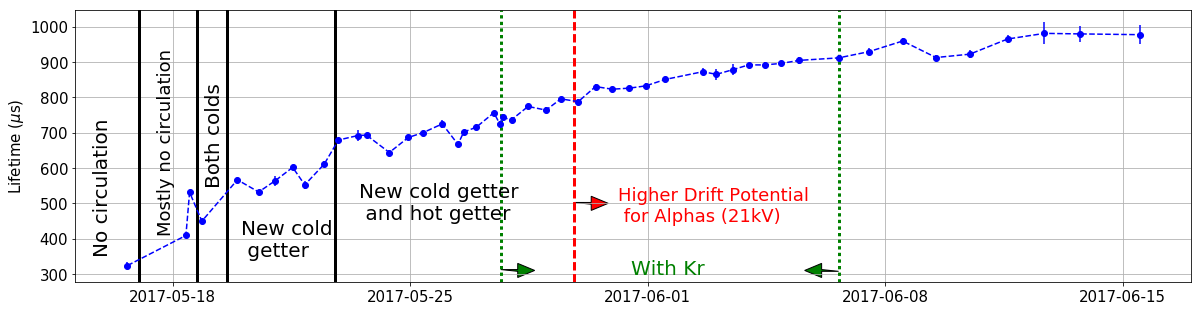

In [7]:
plt.figure(figsize=(20,5))

date0 = list(map(str_to_datetime, lifetimes.Date_start.values))
date1 = list(map(str_to_datetime, lifetimes.Date_end  .values))
ddate = list(map(lambda x,y: (x-y)*0.5, date1, date0)) #move dates to mean run time
datec = list(map(lambda x,y: (x+y)    , date0, ddate))

plt.errorbar(datec, lifetimes.LT, lifetimes.LTu, ddate, linestyle='--', fmt='o', c='blue')
plt.grid(True)
plt.ylabel('Lifetime ($\mu$s)')

for ci  in changes:
    plt.axvline(x=ci, color='k', linewidth=3)
    
for ki  in kripton:
    plt.axvline(x=ki, color='g', linewidth=3, linestyle=':')

plt.arrow(kripton[0], 310,  0.5, 0, width=5, head_width=40, head_length=0.5, fc='g', ec='k')
plt.arrow(kripton[1], 310, -0.5, 0, width=5, head_width=40, head_length=0.5, fc='g', ec='k')

    
plt.axvline(x=DP, color='r', linewidth=3, linestyle='--')
plt.arrow(DP, 500, 0.5, 0,width=5, head_width=40, head_length=0.5, fc='r', ec='k')

# Labels in plot
auxd = str_to_datetime('2017-05-15 15:30:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 700, 'No circulation', fontsize=20, rotation='vertical')

auxd = str_to_datetime('2017-05-17 12:30:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 900.0, 'Mostly no circulation', fontsize=18, rotation='vertical')

auxd = str_to_datetime('2017-05-18 23:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 800, 'Both colds', fontsize=20, rotation='vertical')

auxd = str_to_datetime('2017-05-20 00:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 350, 'New cold \n getter', fontsize=20, rotation='horizontal')

auxd = str_to_datetime('2017-05-23 12:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 455, 'New cold getter \n and hot getter', fontsize=20, rotation='horizontal')

auxd = str_to_datetime('2017-05-31 12:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 300, 'With Kr', fontsize=20, rotation='horizontal', color='g')

auxd = str_to_datetime('2017-05-31 3:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 450.0, 'Higher Drift Potential \n for Alphas (21kV)', fontsize=18, rotation='horizontal', color='r');

# Drift velocity evolution

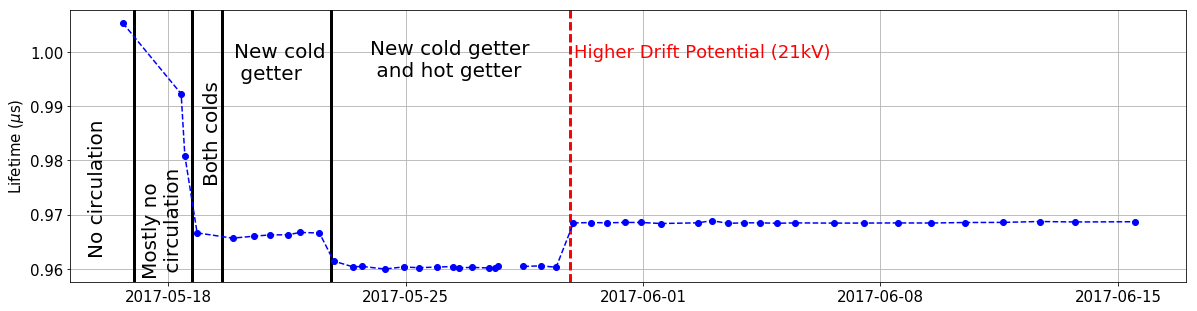

In [20]:
plt.figure(figsize=(20,5))

date0 = list(map(str_to_datetime, lifetimes.Date_start.values))
date1 = list(map(str_to_datetime, lifetimes.Date_end  .values))
ddate = list(map(lambda x,y: (x-y)*0.5, date1, date0)) #move dates to mean run time
datec = list(map(lambda x,y: (x+y)    , date0, ddate))

plt.errorbar(datec, lifetimes.v_drift, lifetimes.u_v_drift, ddate, linestyle='--', fmt='o', c='blue')
plt.grid(True)
plt.ylabel('Lifetime ($\mu$s)')

for ci  in changes:
    plt.axvline(x=ci, color='k', linewidth=3)

plt.axvline(x=DP, color='k', linewidth=3, linestyle='--', c='red')
    
# Labels in plot
auxd = str_to_datetime('2017-05-15 15:30:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.9850, 'No circulation', fontsize=20, rotation='vertical')

auxd = str_to_datetime('2017-05-17 05:30:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.9720, 'Mostly no \n circulation', fontsize=20, rotation='vertical')

auxd = str_to_datetime('2017-05-19 01:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.9920, 'Both colds', fontsize=20, rotation='vertical')

auxd = str_to_datetime('2017-05-19 22:30:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.9950, 'New cold \n getter', fontsize=20, rotation='horizontal')

auxd = str_to_datetime('2017-05-23 23:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.9955, 'New cold getter \n and hot getter', fontsize=20, rotation='horizontal');


auxd = str_to_datetime('2017-05-29 23:00:0', '%Y-%m-%d %H:%M:%S')
plt.text(auxd, 0.99900, 'Higher Drift Potential (21kV)', fontsize=18, rotation='horizontal', color='r');